# Блок 1 (python basics):

## Задание 1.1
[*Пифагоровы тройки*](https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D1%84%D0%B0%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0_%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B0) - это такие такие тройки натуральных чисел $(x, y, z)$, например, $(3, 4, 5)$, что $x^2 + y^2 = z^2$.

Найти все пифагоровы тройки для $z < 200$.

In [2]:
def printPythagoreanTriplets(limit):
    p = limit
    count = 1
    x, y, z = p, p, p
    for a in range(1,x):
        for b in range(a+1,y):
            for c in range(1,z):
                if a*a + b*b == c*c:
                    print (f'{count}: {a}, {b}, {c}')
                    count += 1
                    print (f'{count}: {b}, {a}, {c}')
                    count += 1


                
def printPythagoreanPrimitiveTriplets(limit):
    c, m = 0, 0
    count = 1
    while limit > c:
        for n in range(1, m):
            a = m ** 2 - n ** 2
            b = 2 * m * n
            c = m ** 2 + n ** 2
            if c >= limit:
                break
            print(f'{count}: {a}, {b}, {c}')
            count += 1
        m = m + 1

limit = 200
printPythagoreanTriplets(limit)



1: 3, 4, 5
2: 4, 3, 5
3: 5, 12, 13
4: 12, 5, 13
5: 6, 8, 10
6: 8, 6, 10
7: 7, 24, 25
8: 24, 7, 25
9: 8, 15, 17
10: 15, 8, 17
11: 9, 12, 15
12: 12, 9, 15
13: 9, 40, 41
14: 40, 9, 41
15: 10, 24, 26
16: 24, 10, 26
17: 11, 60, 61
18: 60, 11, 61
19: 12, 16, 20
20: 16, 12, 20
21: 12, 35, 37
22: 35, 12, 37
23: 13, 84, 85
24: 84, 13, 85
25: 14, 48, 50
26: 48, 14, 50
27: 15, 20, 25
28: 20, 15, 25
29: 15, 36, 39
30: 36, 15, 39
31: 15, 112, 113
32: 112, 15, 113
33: 16, 30, 34
34: 30, 16, 34
35: 16, 63, 65
36: 63, 16, 65
37: 17, 144, 145
38: 144, 17, 145
39: 18, 24, 30
40: 24, 18, 30
41: 18, 80, 82
42: 80, 18, 82
43: 19, 180, 181
44: 180, 19, 181
45: 20, 21, 29
46: 21, 20, 29
47: 20, 48, 52
48: 48, 20, 52
49: 20, 99, 101
50: 99, 20, 101
51: 21, 28, 35
52: 28, 21, 35
53: 21, 72, 75
54: 72, 21, 75
55: 22, 120, 122
56: 120, 22, 122
57: 24, 32, 40
58: 32, 24, 40
59: 24, 45, 51
60: 45, 24, 51
61: 24, 70, 74
62: 70, 24, 74
63: 24, 143, 145
64: 143, 24, 145
65: 25, 60, 65
66: 60, 25, 65
67: 26, 168, 170


## Задание 1.2

Дан текст. Собрать все слова, начинающиеся с одной буквы. Вывести три буквы, с которых чаще всего начинаются слова и сами слова.

In [4]:
from itertools import groupby

text = '''Любви, надежды, тихой славы
Недолго нежил нас обман,
Исчезли юные забавы,
Как сон, как утренний туман;
Но в нас горит еще желанье,
Под гнетом власти роковой
Нетерпеливою душой
Отчизны внемлем призыванье.'''

def printPopularLettersAndsWords(text):
    myList = text.lower().split()
    temp = sorted(myList)
    res = [list(ele) for i, ele in groupby(temp, lambda x: x[0])]
    res.sort(key=len, reverse=True)
    for i in res[:3]:
        print(f'{i[0][0]}: {i}')

printPopularLettersAndsWords(text)


н: ['надежды,', 'нас', 'нас', 'недолго', 'нежил', 'нетерпеливою', 'но']
в: ['в', 'власти', 'внемлем']
г: ['гнетом', 'горит']


# Задание 2 (numpy)

Дана выборка объектов, которая представляет собой `ndarray` размера `samples`x`dim`. Иными словами, строка представляет собой объект, а `i-й` столбец - `i-ую` коородинату в пространстве. 

Для каждого объекта найти `k` объектов, расположенных к нему в пространстве ближе остальных.

Задание со звёздочкой: вычислять не эвклидово растояние, а косинусное.

In [6]:
import numpy as np

class Node:
    coordinate = 0
    dist = 0
    
    def __init__(self, coordinate, dist):
        self.coordinate = coordinate
        self.dist = dist

    
def getDist(array1, array2):
    return np.sum((array1 - array2) ** 2) ** 0.5
    

def printNearestDistances(matrix, quantity):
    distArray = [Node]
    for index, element in enumerate(matrix):
        distArray = []
        print(f'\n{element}:')
        for index2, element2 in enumerate(matrix):
            if index == index2:
                continue
            dist = getDist(element, element2)
            node = Node(element2, dist)
            distArray.append(node)
            
        distArray.sort(key=lambda x: x.dist)
        
        for index, element in enumerate(distArray):
            if index == quantity:
                break
            print(f'{element.coordinate} - {element.dist}')

lists_in_list = [[1, 1, 1], [1, 1, 1], [2, 4, 1], [1, 2, 1], [2, 2, 2], [10, 34, 1], [2, 4, 0]]
matrix = np.array(lists_in_list)
quantity = 4 

printNearestDistances(matrix, quantity)
    



[1 1 1]:
[1 1 1] - 0.0
[1 2 1] - 1.0
[2 2 2] - 1.7320508075688772
[2 4 1] - 3.1622776601683795

[1 1 1]:
[1 1 1] - 0.0
[1 2 1] - 1.0
[2 2 2] - 1.7320508075688772
[2 4 1] - 3.1622776601683795

[2 4 1]:
[2 4 0] - 1.0
[1 2 1] - 2.23606797749979
[2 2 2] - 2.23606797749979
[1 1 1] - 3.1622776601683795

[1 2 1]:
[1 1 1] - 1.0
[1 1 1] - 1.0
[2 2 2] - 1.4142135623730951
[2 4 1] - 2.23606797749979

[2 2 2]:
[1 2 1] - 1.4142135623730951
[1 1 1] - 1.7320508075688772
[1 1 1] - 1.7320508075688772
[2 4 1] - 2.23606797749979

[10 34  1]:
[2 4 1] - 31.04834939252005
[2 4 0] - 31.064449134018133
[2 2 2] - 33.0
[1 2 1] - 33.24154027718932

[2 4 0]:
[2 4 1] - 1.0
[1 2 1] - 2.449489742783178
[2 2 2] - 2.8284271247461903
[1 1 1] - 3.3166247903554


# Задание 3 (matplotlib)

Реализовать вычисление sin и cos через ряд Тэйлора. Увеличить точность при минимальном числе членов. Сравнить точность с `math.sin()` и `math.cos()` соответственно и отобразить графически
* Зависимость точности от числа членов ряда
* Сравнение графиков истиных функций с их приближениями рядами Тэйлора.

Пример:
<center><img src='img/5.3.png'></center>

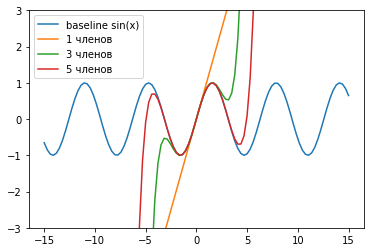

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

def mysin(x, order):
    a = x
    s = a
    for i in range(1, order):
        a *= -1 * x**2/((2 * i) * (2 * i + 1))
        s += a
    return s

vmysin = np.vectorize(mysin, excluded=['order'])

x = np.linspace(-15, 15, 100)
y2 = vmysin(x, 1)
y3 = vmysin(x, 3)
y5 = vmysin(x, 5)
y = np.sin(x)

plt.plot(x, y, label='baseline sin(x)')
plt.plot(x, y2, label='1 членов')
plt.plot(x, y3, label='3 членов')
plt.plot(x, y5, label='5 членов')
plt.ylim([-3, 3])
plt.legend()
plt.show()

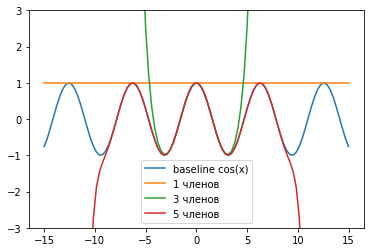

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

def mycos(x, n):
    s = 0
    for i in range(n):
        s += (-1)**i * ((x**(2*i))/math.factorial(2*i))
    return s

vmysin = np.vectorize(mycos, excluded=['order'])

x = np.linspace(-15, 15, 100)
y2 = vmysin(x, 1)
y3 = vmysin(x, 5)
y5 = vmysin(x, 12)
y = np.cos(x)


plt.plot(x, y, label='baseline cos(x)')
plt.plot(x, y2, label='1 членов')
plt.plot(x, y3, label='3 членов')
plt.plot(x, y5, label='5 членов')

plt.ylim([-3, 3])
plt.legend()
plt.show()